# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
       

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City '" + city.title() +" 'not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City 'Sentyabrskiy 'not found. Skipping...
Processing Record 2 of Set 1 | fukuma
Processing Record 3 of Set 1 | kununurra
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | kidal
Processing Record 6 of Set 1 | beloye
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | zhanaozen
Processing Record 14 of Set 1 | fatsa
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | quatre cocos
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | kungurtug
Processing Record 20 of Set 1 | peniche
Processing Record 21 of Set 1 | flinders
Processing Record 22 of Set 1 | yatou
Process

Processing Record 30 of Set 4 | bargal
City 'Bargal 'not found. Skipping...
Processing Record 31 of Set 4 | macaracas
Processing Record 32 of Set 4 | asadabad
Processing Record 33 of Set 4 | whitianga
Processing Record 34 of Set 4 | kaseda
Processing Record 35 of Set 4 | zhigansk
Processing Record 36 of Set 4 | buchanan
Processing Record 37 of Set 4 | ijaki
City 'Ijaki 'not found. Skipping...
Processing Record 38 of Set 4 | yambio
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | caxito
Processing Record 41 of Set 4 | husavik
Processing Record 42 of Set 4 | san quintin
Processing Record 43 of Set 4 | yeppoon
Processing Record 44 of Set 4 | doha
Processing Record 45 of Set 4 | samusu
City 'Samusu 'not found. Skipping...
Processing Record 46 of Set 4 | the pas
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | ladario
Processing Record 0 of Set 5 | richards bay
Processing Record 1 of Set 5 | bassar
Processi

Processing Record 14 of Set 8 | pundaguitan
Processing Record 15 of Set 8 | pisco
Processing Record 16 of Set 8 | roald
Processing Record 17 of Set 8 | pakhtakoron
Processing Record 18 of Set 8 | faanui
Processing Record 19 of Set 8 | skvyra
Processing Record 20 of Set 8 | puerto escondido
Processing Record 21 of Set 8 | vestmannaeyjar
Processing Record 22 of Set 8 | tambopata
Processing Record 23 of Set 8 | beisfjord
Processing Record 24 of Set 8 | hamilton
Processing Record 25 of Set 8 | waingapu
Processing Record 26 of Set 8 | carutapera
Processing Record 27 of Set 8 | henties bay
Processing Record 28 of Set 8 | ambilobe
Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | formoso do araguaia
City 'Formoso Do Araguaia 'not found. Skipping...
Processing Record 31 of Set 8 | broken hill
Processing Record 32 of Set 8 | sapao
City 'Sapao 'not found. Skipping...
Processing Record 33 of Set 8 | vao
Processing Record 34 of Set 8 | copiapo
Processing Record 35 of Set 8 

Processing Record 46 of Set 11 | livny
Processing Record 47 of Set 11 | batavia
Processing Record 48 of Set 11 | vaitupu
City 'Vaitupu 'not found. Skipping...
Processing Record 49 of Set 11 | cordoba
Processing Record 0 of Set 12 | kodinsk
Processing Record 1 of Set 12 | nisia floresta
Processing Record 2 of Set 12 | trinidad
Processing Record 3 of Set 12 | skjervoy
Processing Record 4 of Set 12 | auki
Processing Record 5 of Set 12 | emerald
Processing Record 6 of Set 12 | san patricio
Processing Record 7 of Set 12 | college
Processing Record 8 of Set 12 | ligayan
Processing Record 9 of Set 12 | gannan
Processing Record 10 of Set 12 | calvinia
Processing Record 11 of Set 12 | freeport
Processing Record 12 of Set 12 | arvika
Processing Record 13 of Set 12 | baghdad
Processing Record 14 of Set 12 | gulshat
City 'Gulshat 'not found. Skipping...
Processing Record 15 of Set 12 | bakel
Processing Record 16 of Set 12 | tabas
Processing Record 17 of Set 12 | aykhal
Processing Record 18 of Set 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fukuma,33.7667,130.4667,13.00,61,100,1.77,JP,1680208765
1,Kununurra,-15.7667,128.7333,21.99,94,100,0.00,AU,1680208491
2,Georgetown,5.4112,100.3354,26.96,89,20,1.54,MY,1680208761
3,Kidal,18.4411,1.4078,27.18,6,0,5.80,ML,1680208765
4,Beloye,48.4952,39.0505,0.64,98,100,10.03,UA,1680208766


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Fukuma,33.7667,130.4667,13.00,61,100,1.77,JP,1680208765
1,Kununurra,-15.7667,128.7333,21.99,94,100,0.00,AU,1680208491
2,Georgetown,5.4112,100.3354,26.96,89,20,1.54,MY,1680208761
3,Kidal,18.4411,1.4078,27.18,6,0,5.80,ML,1680208765
4,Beloye,48.4952,39.0505,0.64,98,100,10.03,UA,1680208766


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

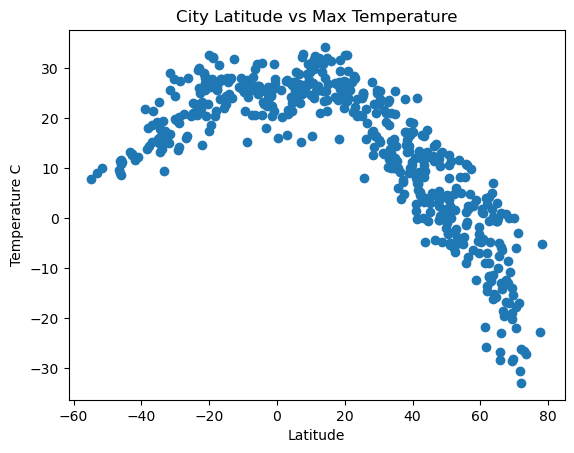

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature C")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

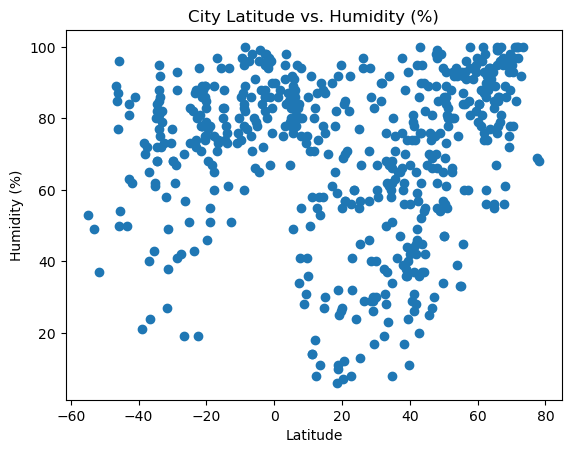

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

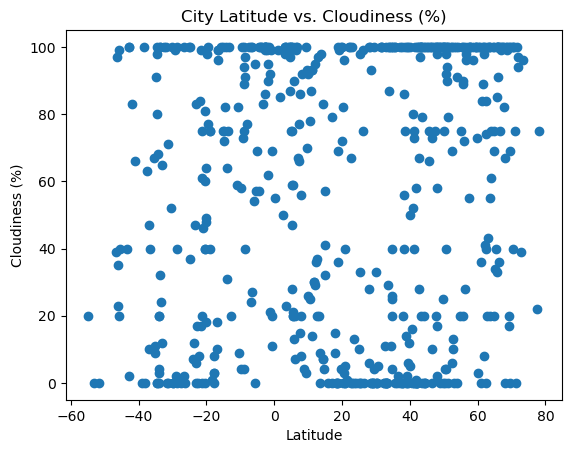

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

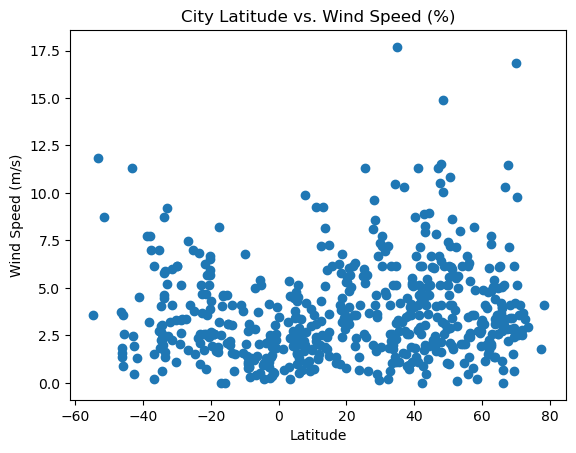

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, srderr) = linregress(x_values, y_values)

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
60,Tasiilaq,65.6145,-37.6368,-4.91,95,100,3.66,GL,1680208793
514,Bakel,14.9050,-12.4568,32.05,30,57,7.25,SN,1680208982
182,Burghausen,48.1667,12.8333,10.49,99,58,3.23,DE,1680208849
311,Bilma,18.6853,12.9164,25.97,11,36,4.48,NE,1680208906
283,Hauterive,46.0901,3.4459,12.42,76,100,2.45,FR,1680208896
446,Krasnoarmeysk,51.0239,45.6969,2.49,81,90,3.42,RU,1680208949
384,Clyde River,70.4692,-68.5914,-17.87,78,100,5.14,CA,1680208837
208,Maloy,61.9353,5.1136,2.85,76,98,2.26,NO,1680208865
542,Celestun,20.8667,-90.4000,29.43,57,0,6.07,MX,1680208996


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
368,Urucara,-2.5364,-57.7600,23.91,98,100,0.28,BR,1680208918
479,Port-Gentil,-0.7193,8.7815,26.98,83,20,2.57,GA,1680208764
370,Kefamenanu,-9.4467,124.4781,21.37,97,100,1.40,ID,1680208918
332,Pisco,-13.7000,-76.2167,28.03,61,75,4.12,PE,1680208620
179,Ladario,-19.0047,-57.6017,32.16,55,75,2.57,BR,1680208599
357,Bulawayo,-20.1500,28.5833,17.46,83,64,3.90,ZW,1680208915
124,Plettenberg Bay,-34.0527,23.3716,14.79,88,3,2.02,ZA,1680208825
146,Bela Vista De Goias,-16.9728,-48.9533,30.64,71,10,2.52,BR,1680208836
204,Fare,-16.7000,-151.0167,27.54,74,96,4.05,PF,1680208863


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


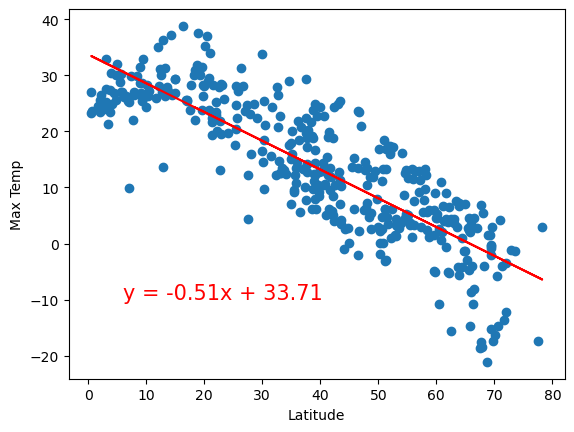

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


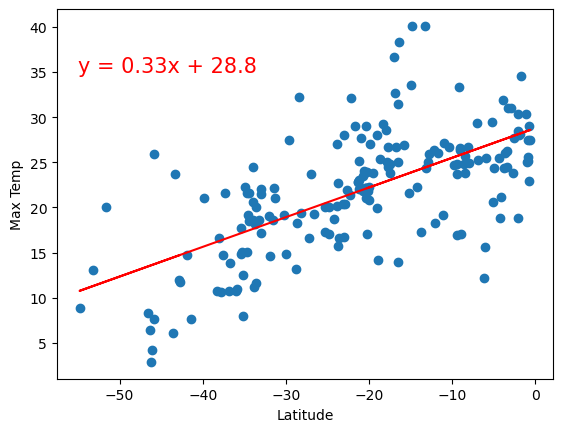

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


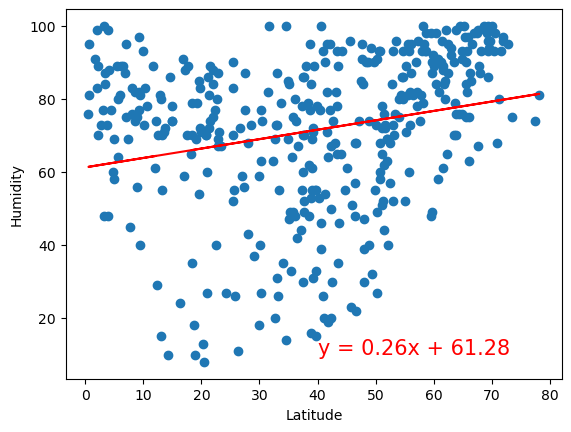

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


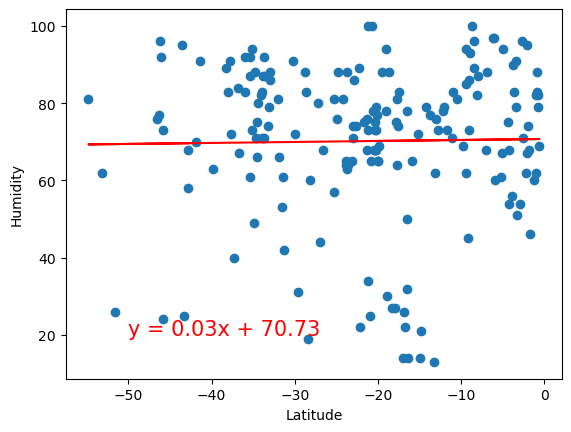

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


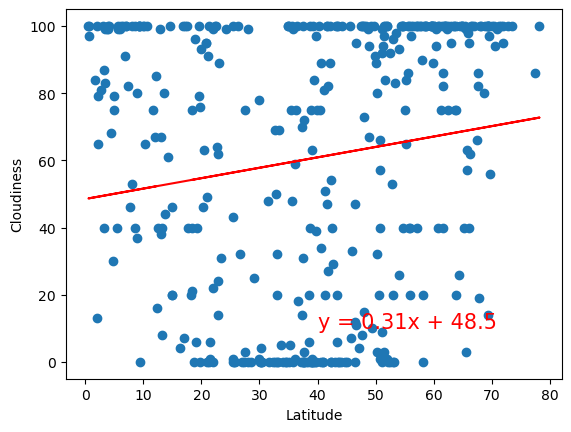

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


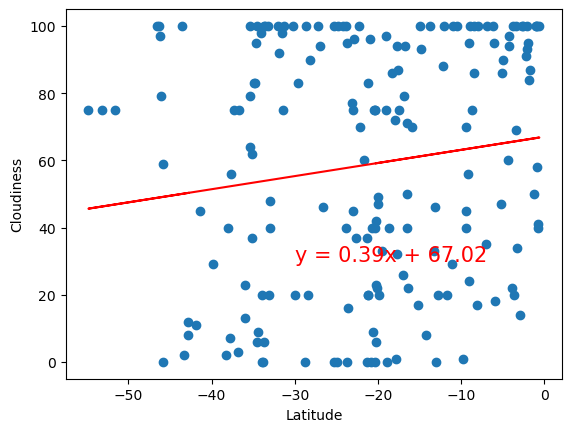

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


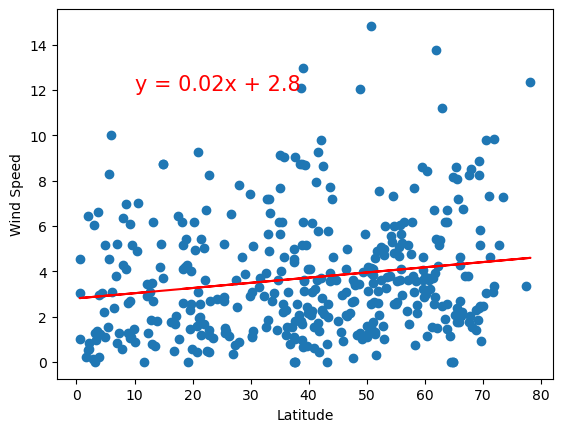

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


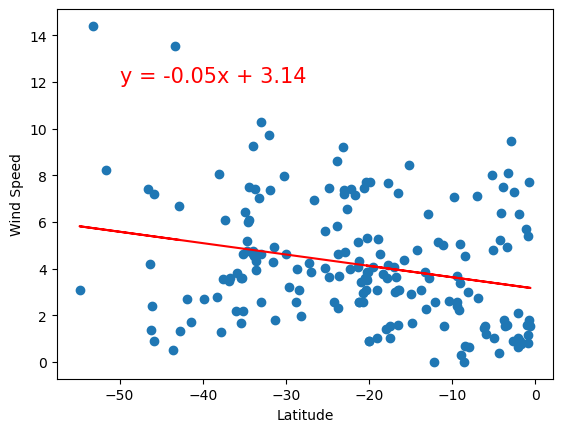

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE